In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile

In [8]:
sample_rate, data = wavfile.read('../data/section_3.wav')

print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

Sample rate: 192000 Hz
Data shape: (813130,)


/var/folders/3d/d9dsxkl92nz9mr2x53ct_fvh0000gn/T/ipykernel_4006/802638381.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('../data/section_3.wav')


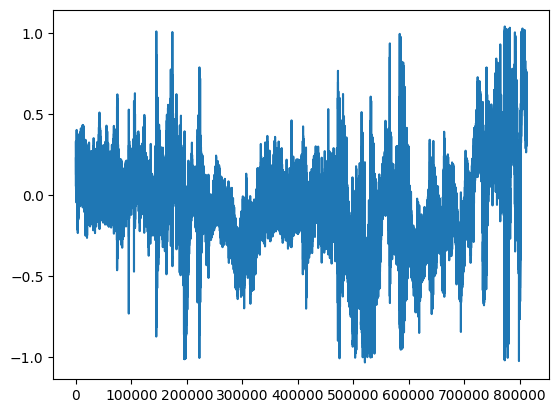

In [9]:
plt.plot(data)
plt.show()


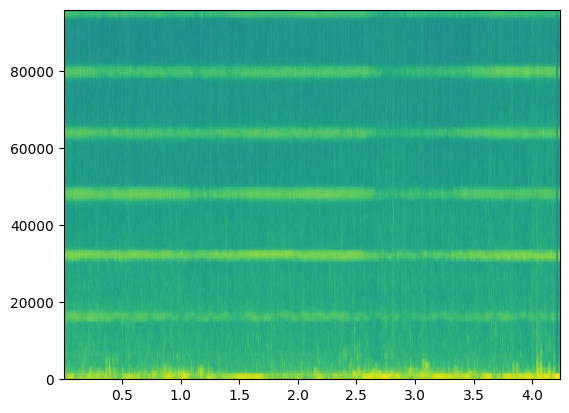

In [10]:
plt.specgram(data, Fs=sample_rate)
plt.show()

48


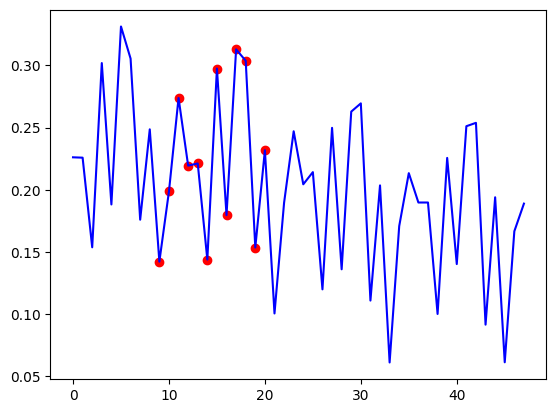

In [31]:
wl = (sample_rate // 16000) * 4
print(wl)
plt.plot(data[0:wl], color='blue')
plt.scatter(np.arange(9,21), data[9:21], color='red')
plt.show()

In [78]:
def plot_segments_with_average(x, w, show=True):
    x = np.array(x)
    n_segments = len(x) // w
    if n_segments == 0:
        raise ValueError("Length of x must be at least 'w'.")

    # Reshape x into segments of length w
    segments = x[:n_segments * w].reshape(n_segments, w)

    # Calculate and plot the average line
    avg_line = segments.mean(axis=0)

    if show:
    # Plot each segment
        for i, segment in enumerate(segments):
            plt.plot(segment, label=f"Segment {i+1}", alpha=0.6, color='grey')

    
        plt.plot(avg_line, label="Average", linewidth=2, color='black')
        plt.xlabel("Index within segment")
        plt.ylabel("Value")
        plt.title(f"{n_segments} Segments of {w} samples with average line")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    return avg_line


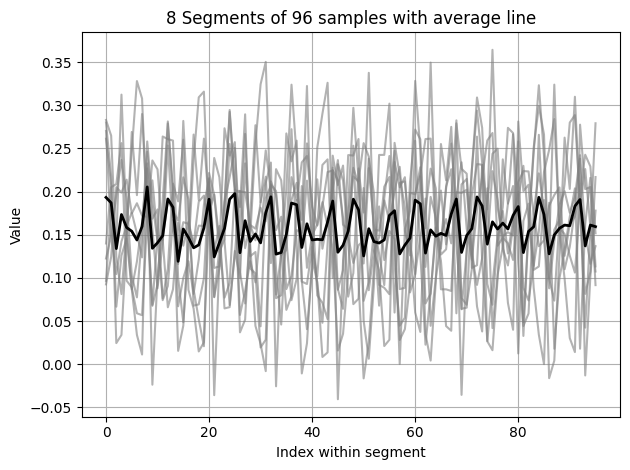

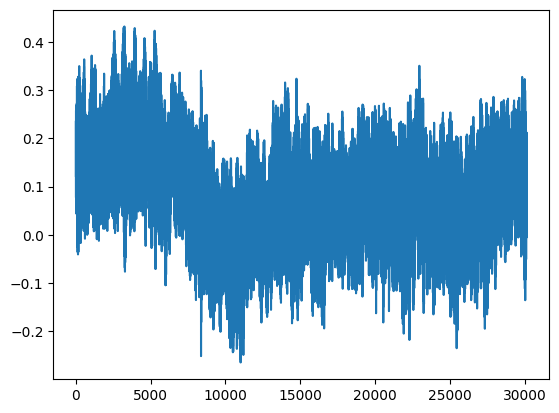

In [99]:
w = 12 * 8
n = 8
s = 9027
plot_segments_with_average(data[s:((w*n)+s)], w)

plt.plot(data[s:((w*n)+s)*4])
plt.show()

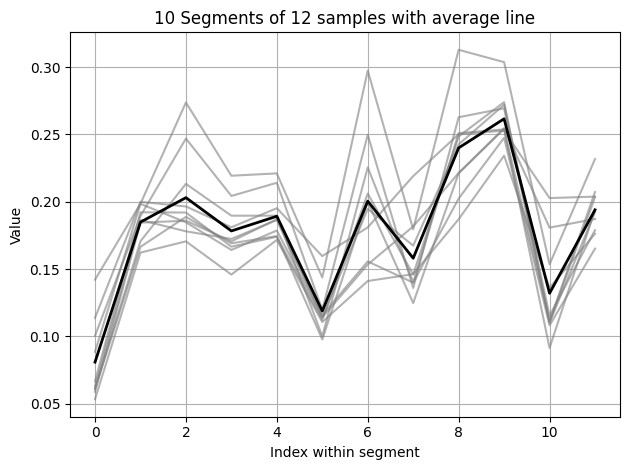

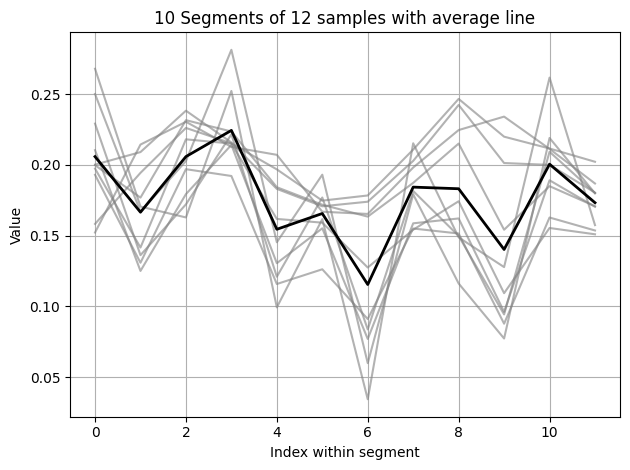

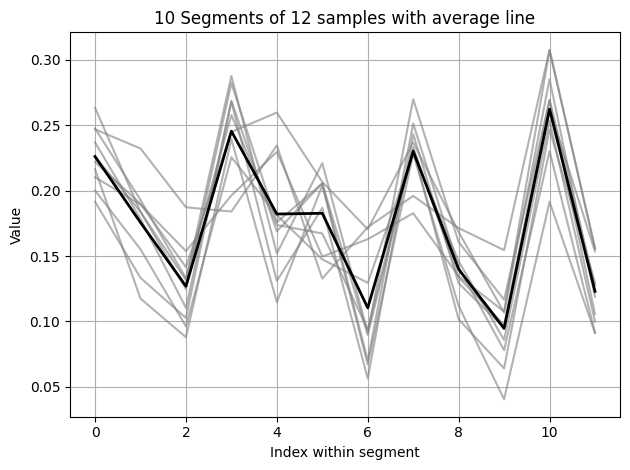

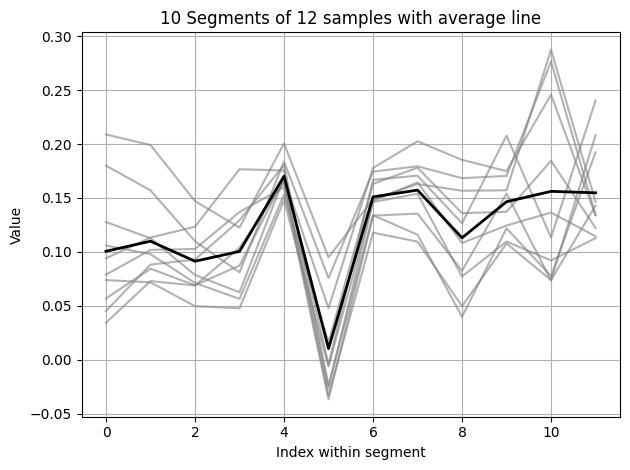

In [107]:
w = 12  # window size
n = 10  # number of windows on which to calc avg
s = 9  # starting position
reps = 100  # num of sections to to the procedure

for i in range(4):
    _s = s + (i*w*n)
    _e = _s + (w*n)
    if _e > len(data):
        break
    plot_segments_with_average(data[_s:_e], w)

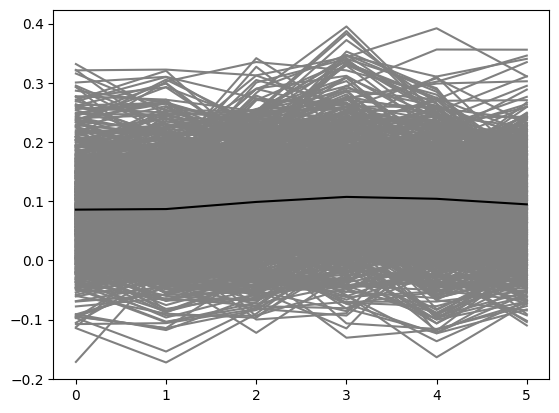

In [106]:
w = 6  # window size
n = 10  # number of windows on which to calc avg
s = 9  # starting position
reps = 1000  # num of sections to to the procedure

patterns = np.zeros((reps, w))
for i in range(reps):
    _s = s + (i*w*n)
    _e = _s + (w*n)
    if _e > len(data):
        break
    patterns[i, :] = plot_segments_with_average(data[_s:_e], w, False)
    plt.plot(patterns[i, :], color="grey")

avg_pattern = np.average(patterns, axis=0)
plt.plot(avg_pattern, color="black")


In [105]:
192000/6

32000.0